# Data Exploration and Wrangling

#### Importation du csv et transformation au format dataframe pandas

In [1]:
# Importation des librairies
import pandas as pd
import os

# print le dossier de travail
print(os.getcwd())

# export du csv au format dataframe de pandaq
chemin_fichier = "data/dvf.csv"
df = pd.read_csv(chemin_fichier)

# montre les 5 premières lignes (à utiliser avec Data Wrangler)
df.head()

/Users/theodorefischer/Desktop/Perso/Projet/prediction-immobilier


/var/folders/g9/1z_9t2sn34d6xr4x1kfly2dw0000gn/T/ipykernel_56536/2811993732.py:10: DtypeWarning: Columns (2,4,5,9,10,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(chemin_fichier)


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,2020-1426687,2020-01-02,1,Vente,268800.0,14.0,NaN,RUE DE L ARCADE,0411,75008.0,...,24.0,1.0,NaN,NaN,NaN,NaN,NaN,2.323937,48.871607,000BS
1,2020-1426688,2020-01-06,1,Vente,878378.0,9.0,NaN,BD DE LA MADELEINE,5888,75001.0,...,43.0,0.0,NaN,NaN,NaN,NaN,NaN,2.326882,48.869331,000BC
2,2020-1426688,2020-01-06,1,Vente,878378.0,9.0,NaN,BD DE LA MADELEINE,5888,75001.0,...,66.0,2.0,NaN,NaN,NaN,NaN,NaN,2.326882,48.869331,000BC
3,2020-1426689,2020-01-10,1,Vente,680000.0,10.0,NaN,RUE DU BOURG L ABBE,1200,75003.0,...,51.0,2.0,NaN,NaN,NaN,NaN,NaN,2.351965,48.864157,000AV
4,2020-1426690,2020-01-03,1,Vente,852000.0,24.0,NaN,RUE DE SAINTONGE,8716,75003.0,...,12.0,1.0,NaN,NaN,NaN,NaN,NaN,2.363196,48.862017,000AK


In [2]:
# print la forme du data frame
print(df.shape)

# et le type de chaque attribute
print(df.dtypes)

# et le description générale
df.describe(include='all')

(389593, 41)
id_mutation                     object
date_mutation                   object
numero_disposition              object
nature_mutation                 object
valeur_fonciere                 object
adresse_numero                  object
adresse_suffixe                 object
adresse_nom_voie                object
adresse_code_voie               object
code_postal                     object
code_commune                    object
nom_commune                     object
code_departement                object
ancien_code_commune             object
ancien_nom_commune              object
id_parcelle                     object
ancien_id_parcelle              object
numero_volume                   object
lot1_numero                     object
lot1_surface_carrez             object
lot2_numero                     object
lot2_surface_carrez             object
lot3_numero                     object
lot3_surface_carrez             object
lot4_numero                     object
lot4_surface

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
count,389593,389593,389593,389593,385212.0,387613.0,17830,387685,387685,387677.0,...,206213.0,384627.0,31671,31671,355,355,31671.0,388960,388960,389593
unique,132363,1419,13,7,37513.0,751.0,14,3888,3821,41.0,...,1687.0,40.0,5,5,3,3,1166.0,51264,46582,160
top,2022-1670285,2022-04-19,1,Vente,300000.0,6.0,B,RUE DE VAUGIRARD,9624,75015.0,...,30.0,0.0,S,sols,IMM,Dépendances d'ensemble immobilier,5490.0,2.3385170,48.8547860,000AR
freq,2197,2549,272558,382080,1618.0,7675.0,13951,3692,3692,46864.0,...,3889.0,141150.0,31176,31176,346,346,644.0,674,673,7179


#### On a donc 41 colonnes et 389593 lignes. Toutes les colonnes sont des object python, donc à transformer en float/int pour les données numériques, string pour les rues,etc... et datetime pour la date.

# Partie 1 : Tri vertical des données (suppression des colonnes)

## Partie 1.1 : supression des données vides 

In [3]:
# Comptons pour chaque attribut le nombre de valeurs nnon remplies (égales à NaN)
df.isnull().sum()

id_mutation                          0
date_mutation                        0
numero_disposition                   0
nature_mutation                      0
valeur_fonciere                   4381
adresse_numero                    1980
adresse_suffixe                 371763
adresse_nom_voie                  1908
adresse_code_voie                 1908
code_postal                       1916
code_commune                         0
nom_commune                          0
code_departement                     0
ancien_code_commune             389586
ancien_nom_commune              389586
id_parcelle                          0
ancien_id_parcelle              389586
numero_volume                   387977
lot1_numero                      33301
lot1_surface_carrez             237367
lot2_numero                     221664
lot2_surface_carrez             343415
lot3_numero                     361742
lot3_surface_carrez             384836
lot4_numero                     379371
lot4_surface_carrez      

#### On voit que beaucoup de colonnes sont vides ou très peu remplies, supprimons-les si elles sont inutiles. On décide pour l'instant de supprimer les colonnes qui  sont remplies à moins de 20%, si elles sont inutiles, les autres pouvant être des informations complémentaires pour le modèle.

In [4]:
# Créeons une fonction qui nous liste les colonnes remplies à moins de 20%, on regardera ensuite si elle est utile ou non 
def trouver_colonnes_insuiffisamment_remplies(df):
    colonnes_a_supprimer = []
    for column in df.columns :
        if (df[column].isnull().sum()/len(df)) >= 0.80 :
            colonnes_a_supprimer.append(column)
    return colonnes_a_supprimer

columns_to_delete = trouver_colonnes_insuiffisamment_remplies(df)
print(columns_to_delete)

['adresse_suffixe', 'ancien_code_commune', 'ancien_nom_commune', 'ancien_id_parcelle', 'numero_volume', 'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez', 'lot4_numero', 'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez', 'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale', 'nature_culture_speciale', 'surface_terrain']


In [5]:
# Supprimons les colonnes trouvées
df.drop(columns=columns_to_delete, inplace=True)

df.shape

(389593, 24)

## Partie 1.2 : Analyse des données numériques

#### Transformons maintenant les colonnes numériques et analysons les afin de supprimer les colonnes inutiles

In [6]:
# pour convertir automatiquement tout ce qui est possible sans erreurs
df = df.convert_dtypes()

# montre les types de chaque colonnes
df.dtypes

id_mutation                  string[python]
date_mutation                string[python]
numero_disposition                   object
nature_mutation              string[python]
valeur_fonciere                      object
adresse_numero                       object
adresse_nom_voie             string[python]
adresse_code_voie            string[python]
code_postal                          object
code_commune                         object
nom_commune                  string[python]
code_departement                     object
id_parcelle                  string[python]
lot1_numero                          object
lot1_surface_carrez                  object
lot2_numero                          object
nombre_lots                          object
code_type_local                      object
type_local                   string[python]
surface_reelle_bati                  object
nombre_pieces_principales            object
longitude                            object
latitude                        

In [7]:
# attributs à convertir 
numeric_attribute = ['valeur_fonciere','numero_disposition','adresse_numero','adresse_code_voie','code_postal','code_commune','code_departement', 
                     'lot1_numero', 'lot1_surface_carrez', 'lot2_numero','nombre_lots', 'code_type_local', 'surface_reelle_bati',
                     'nombre_pieces_principales', 'longitude', 'latitude']

# conversion en numériques
for attribute in numeric_attribute:
    df[attribute] = pd.to_numeric(df[attribute], errors='coerce')

# vérification des types (est ce que ça c'est bien converti)
print(df.dtypes)
# vérification qu'il n'y aie pas de pertes de données en convertissant
df.isnull().sum()

id_mutation                  string[python]
date_mutation                string[python]
numero_disposition                  float64
nature_mutation              string[python]
valeur_fonciere                     float64
adresse_numero                      float64
adresse_nom_voie             string[python]
adresse_code_voie                     Int64
code_postal                         float64
code_commune                        float64
nom_commune                  string[python]
code_departement                    float64
id_parcelle                  string[python]
lot1_numero                         float64
lot1_surface_carrez                 float64
lot2_numero                         float64
nombre_lots                         float64
code_type_local                     float64
type_local                   string[python]
surface_reelle_bati                 float64
nombre_pieces_principales           float64
longitude                           float64
latitude                        

id_mutation                       0
date_mutation                     0
numero_disposition                7
nature_mutation                   0
valeur_fonciere                4388
adresse_numero                 1987
adresse_nom_voie               1908
adresse_code_voie              2178
code_postal                    1923
code_commune                      7
nom_commune                       0
code_departement                  7
id_parcelle                       0
lot1_numero                   33463
lot1_surface_carrez          237374
lot2_numero                  221709
nombre_lots                       7
code_type_local                4914
type_local                     4907
surface_reelle_bati          183387
nombre_pieces_principales      4973
longitude                       640
latitude                        640
section_prefixe                   0
dtype: int64

#### Explorons maintenant les valeures dans ces attributs. La fonction describe nous donne des informations dessus

In [8]:
# description des attributs numériques
df.describe()

,numero_disposition,valeur_fonciere,adresse_numero,adresse_code_voie,code_postal,code_commune,code_departement,lot1_numero,lot1_surface_carrez,lot2_numero,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
count,389586.000000,3.852050e+05,387606.000000,387415.0,387670.000000,389586.000000,389586.0,356130.000000,152219.000000,167884.000000,389586.000000,384679.000000,206206.000000,384620.000000,388953.000000,388953.000000
mean,1.010221,2.818567e+06,51.066895,5169.666946,75012.771437,75112.772464,75.0,267.852248,59.051281,246.404178,1.474391,2.589822,68.449167,1.156989,2.333185,48.853391
std,0.118875,1.640062e+07,122.417875,2936.445848,4.111548,4.104354,0.0,1470.110011,88.121517,1009.699546,1.174605,0.612792,257.496530,1.536866,0.040444,0.017784
min,1.000000,1.500000e-01,1.000000,2.0,75001.000000,75101.000000,75.0,1.000000,0.010000,2.000000,0.000000,1.000000,1.000000,0.000000,2.255896,48.816561
25%,1.000000,2.700000e+05,11.000000,2569.0,75011.000000,75111.000000,75.0,16.000000,26.830000,24.000000,1.000000,2.000000,27.000000,0.000000,2.298689,48.839876
50%,1.000000,5.220000e+05,28.000000,5240.0,75014.000000,75114.000000,75.0,37.000000,43.800000,49.000000,1.000000,3.000000,44.000000,0.000000,2.331454,48.851027
75%,1.000000,1.104000e+06,67.000000,7845.0,75016.000000,75116.000000,75.0,126.000000,71.590000,121.000000,2.000000,3.000000,72.000000,2.000000,2.369443,48.865591
max,7.000000,1.003401e+09,9001.000000,9992.0,75020.000000,75120.000000,75.0,100245.000000,7392.000000,40650.000000,152.000000,4.000000,48630.000000,32.000000,2.415063,48.901507


#### On supprime les attributs inutiles comme code_departement (tout le tempes le même), 'numero_disposition' (sert à identifier une transaction), 'lot2_numero' et 'nombre_lot' (on ne s'intéresse qu'à un seul lot) et 'code_type_local'

In [9]:
# attributs inutiles
attributs_inutiles = ['code_departement', 'numero_disposition','lot2_numero','nombre_lots','code_type_local']
#supression
df.drop(columns=attributs_inutiles, inplace=True)

# verification de la supression sur la shape
df.shape

(389593, 19)

#### Affichons maintenant la matrice de corrélation pour regarder si on a des attributs utiles mais redondantes

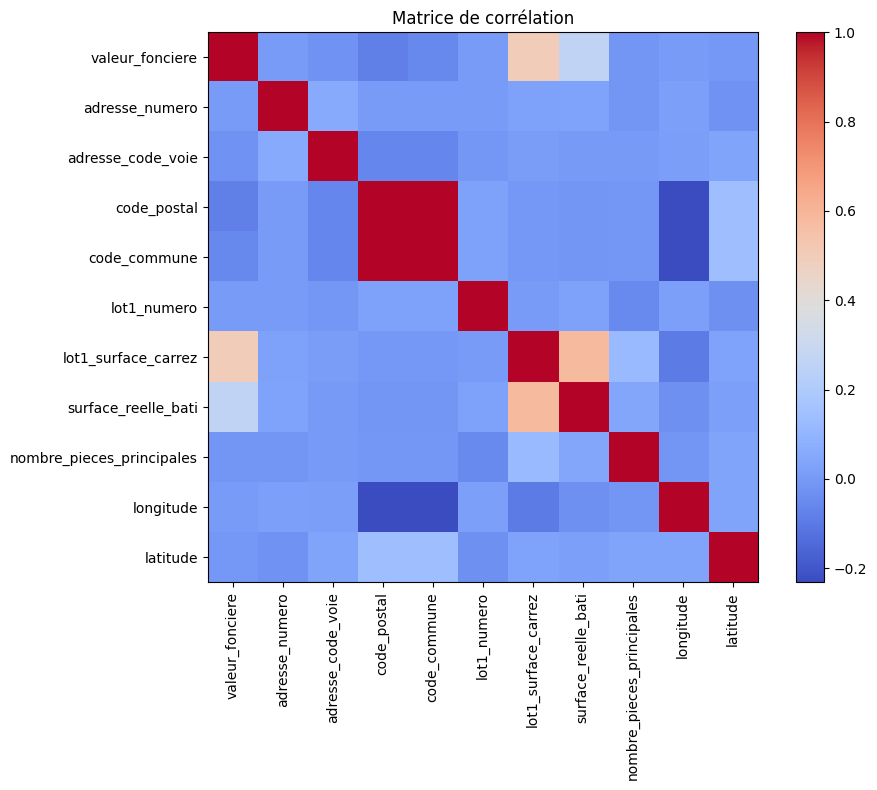

In [10]:
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)

# Affichage 
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

#### Les attributs code cummune et code postal sont les mêmes à un chiffre près on choisit donc de conserver code_postal (code coommune sert pour les services fiscaux)

In [11]:
# on supprime la colonne 'code_commune'
attributs_inutiles = ['code_commune']
df.drop(columns=attributs_inutiles, inplace=True)

df.shape

(389593, 18)

## Partie 1.3 : Analyse des attributs non numériques

#### On analyse maintenant les attributs non numériques pour continuer notre tri vertical (quelles colonnes on garde ou non)

In [12]:
df

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,nom_commune,id_parcelle,lot1_numero,lot1_surface_carrez,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,section_prefixe
0,2020-1426687,2020-01-02,Vente,268800.0,14.0,RUE DE L ARCADE,411,75008.0,Paris 8e Arrondissement,75108000BS0136,31.0,NaN,Appartement,24.0,1.0,2.323937,48.871607,000BS
1,2020-1426688,2020-01-06,Vente,878378.0,9.0,BD DE LA MADELEINE,5888,75001.0,Paris 1er Arrondissement,75101000BC0041,63.0,NaN,Local industriel. commercial ou assimilé,43.0,0.0,2.326882,48.869331,000BC
2,2020-1426688,2020-01-06,Vente,878378.0,9.0,BD DE LA MADELEINE,5888,75001.0,Paris 1er Arrondissement,75101000BC0041,14.0,66.64,Appartement,66.0,2.0,2.326882,48.869331,000BC
3,2020-1426689,2020-01-10,Vente,680000.0,10.0,RUE DU BOURG L ABBE,1200,75003.0,Paris 3e Arrondissement,75103000AV0006,9.0,50.74,Appartement,51.0,2.0,2.351965,48.864157,000AV
4,2020-1426690,2020-01-03,Vente,852000.0,24.0,RUE DE SAINTONGE,8716,75003.0,Paris 3e Arrondissement,75103000AK0080,74.0,66.00,Appartement,12.0,1.0,2.363196,48.862017,000AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389588,2022-1672017,2022-05-11,Vente,2306600.0,113.0,BD SAINT MICHEL,8705,75005.0,Paris 5e Arrondissement,75105000BG0074,104.0,157.37,Dépendance,NaN,0.0,2.339024,48.843287,000BG
389589,2022-1672017,2022-05-11,Vente,2306600.0,113.0,BD SAINT MICHEL,8705,75005.0,Paris 5e Arrondissement,75105000BG0074,118.0,NaN,Dépendance,NaN,0.0,2.339024,48.843287,000BG
389590,2022-1672017,2022-05-11,Vente,2306600.0,113.0,BD SAINT MICHEL,8705,75005.0,Paris 5e Arrondissement,75105000BG0074,104.0,157.37,Appartement,180.0,5.0,2.339024,48.843287,000BG
389591,2022-1672018,2022-05-23,Vente,1111900.0,116.0,QUAI LOUIS BLERIOT,5766,75016.0,Paris 16e Arrondissement,75116000AJ0015,647.0,96.18,Appartement,96.0,3.0,2.270776,48.844019,000AJ


In [13]:
# listons les valeurs différentes de "nature_mutation"
df["nature_mutation"].unique()

<StringArray>
[                             'Vente',                            'Echange',
 'Vente en l'état futur d'achèvement',                       'Adjudication',
                      'Expropriation',              'Vente terrain à bâtir',
                    'nature_mutation']
Length: 7, dtype: string

#### On ne garde que les ventes, les autres attributs faussant les prix (les échanges sont très souvent à des prix bien inférieurs au marché), on supprime la colonne par la suite

In [14]:
# filtrage du dataframe pour ne conserver que les ventes
df = df[df['nature_mutation'] == 'Vente']

# on supprime ensuite la colonne
df.drop(columns='nature_mutation', inplace = True)

df.shape

/var/folders/g9/1z_9t2sn34d6xr4x1kfly2dw0000gn/T/ipykernel_56536/811981800.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='nature_mutation', inplace = True)


(382080, 17)

#### On ne s'intéresse qu'aux appartements (les prix étant trop différents pour les autres types à l'exception des maisons qui sont-elles trop peu nombreues), on supprime donc les autres type de biens et l'on supprime ensuite la colonne

In [15]:
# filtrage sur les appartements
df = df[df['type_local'] == 'Appartement']

# suppression de la colonne type_local
df.drop(columns='type_local', inplace = True)

df.shape

(178640, 16)

#### On supprime les autres lignes inutiles ou redondantes

In [16]:
colonnes_redondantes_et_inutiles = ['id_mutation','id_parcelle','lot1_numero', 'section_prefixe']
df.drop(columns=colonnes_redondantes_et_inutiles, inplace = True)

df.shape

(178640, 12)

In [17]:
df

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,nom_commune,lot1_surface_carrez,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,2020-01-02,268800.0,14.0,RUE DE L ARCADE,411,75008.0,Paris 8e Arrondissement,NaN,24.0,1.0,2.323937,48.871607
2,2020-01-06,878378.0,9.0,BD DE LA MADELEINE,5888,75001.0,Paris 1er Arrondissement,66.64,66.0,2.0,2.326882,48.869331
3,2020-01-10,680000.0,10.0,RUE DU BOURG L ABBE,1200,75003.0,Paris 3e Arrondissement,50.74,51.0,2.0,2.351965,48.864157
4,2020-01-03,852000.0,24.0,RUE DE SAINTONGE,8716,75003.0,Paris 3e Arrondissement,66.00,12.0,1.0,2.363196,48.862017
5,2020-01-03,852000.0,24.0,RUE DE SAINTONGE,8716,75003.0,Paris 3e Arrondissement,66.00,19.0,1.0,2.363196,48.862017
...,...,...,...,...,...,...,...,...,...,...,...,...
389583,2022-05-23,577000.0,16.0,RUE DE LA GLACIERE,4201,75013.0,Paris 13e Arrondissement,NaN,53.0,2.0,2.344394,48.836582
389586,2022-05-17,485000.0,4.0,PAS MONTGALLET,6494,75012.0,Paris 12e Arrondissement,NaN,43.0,3.0,2.388119,48.843940
389587,2022-05-25,1170000.0,12.0,RUE DE NICE,6747,75011.0,Paris 11e Arrondissement,NaN,125.0,4.0,2.390734,48.855257
389590,2022-05-11,2306600.0,113.0,BD SAINT MICHEL,8705,75005.0,Paris 5e Arrondissement,157.37,180.0,5.0,2.339024,48.843287


## Partie 2 : Tri horizontal du dataset

#### On supprime tout les doublons pour éviter de fausser nos métriques

In [18]:
# On supprime les doublons
df.drop_duplicates(inplace=True)

# On voit combien de doublons sont supprimés 
df.shape

(113482, 12)

#### On va maintenant s'interresser au numéros de rue pour voir si il n'y a pas de valeures aberrantes

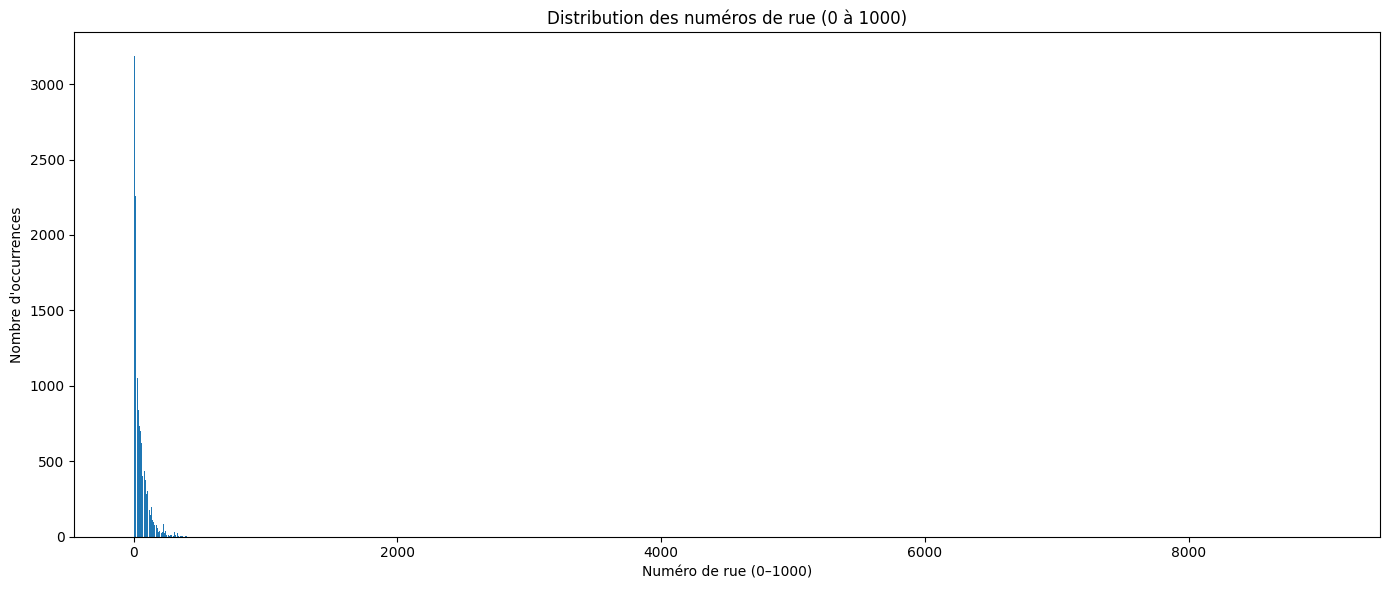

np.float64(9001.0)

In [19]:
# Comptage des occurrences
valeurs = df['adresse_numero'].value_counts().sort_index()

# Affichage
plt.figure(figsize=(14, 6))
plt.bar(valeurs.index, valeurs.values)
plt.xlabel("Numéro de rue (0–1000)")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des numéros de rue (0 à 1000)")
plt.tight_layout()
plt.show()

# Valeur max
df['adresse_numero'].max()

#### On a une valeur max à 9000 qui est evidement faussée. On lit sur intnet qu'à Paris les numéros vont de 1 à 407 (rue de Vaugirard), toutes données supérieures sera donc considérée comme aberrante et supprimée.

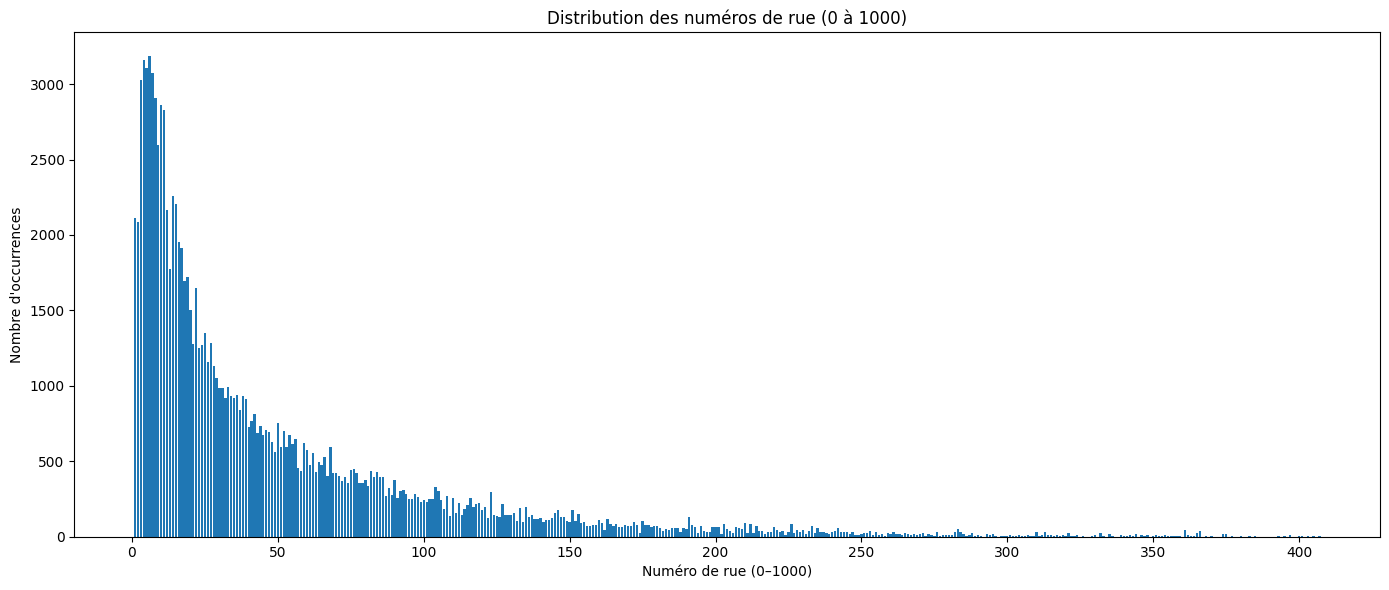

In [20]:
# filtrage des numéros
df = df[df['adresse_numero'] <= 407]

# Comptage des occurrences
valeurs = df['adresse_numero'].value_counts().sort_index()

# Affichage
plt.figure(figsize=(14, 6))
plt.bar(valeurs.index, valeurs.values)
plt.xlabel("Numéro de rue (0–1000)")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des numéros de rue (0 à 1000)")
plt.tight_layout()
plt.show()



#### On s'intéresse maintenant à la surface des appartements attribut (lot1_surface_carrez)

In [21]:
print(df["lot1_surface_carrez"].isnull().sum())

53648


#### On a environ 70 000 lignes ou la surface n'est pas indiquée, on les supprimes car essayer de les compléter par diverses techniques fausserait trop les prédictions étant donné que la moitié des données ne seraient pas réélles

In [22]:
# suppresion des données de surface manquantes
df = df.dropna(subset=['lot1_surface_carrez'])

df.shape

(59820, 12)

#### Interressons nous maintenant aux données extrêmes de surfaces

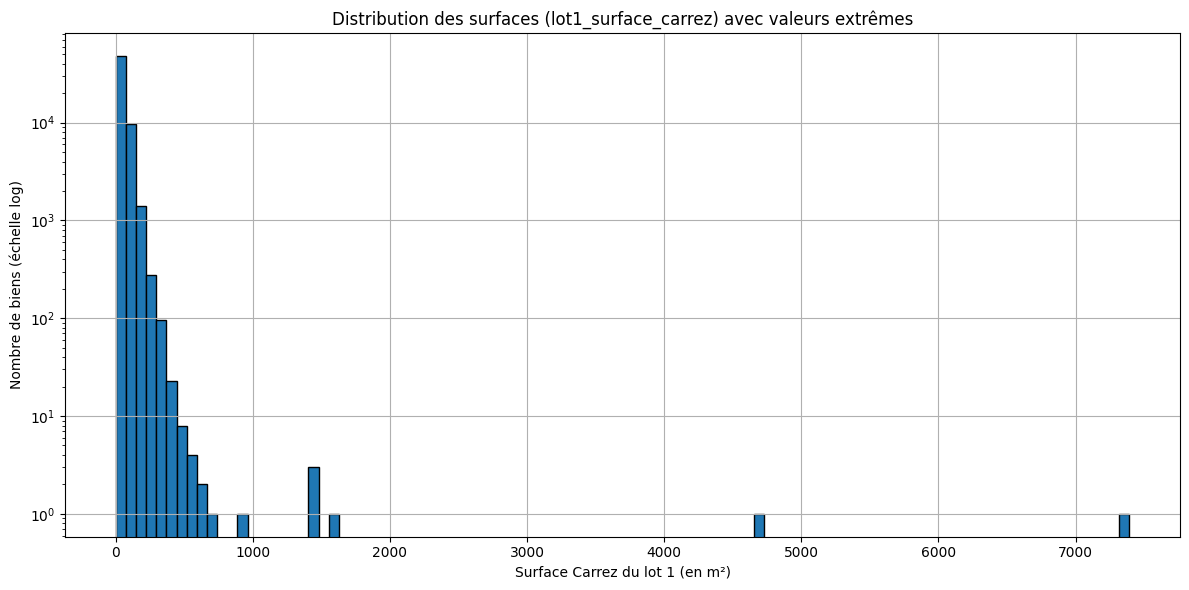

In [23]:
# Histogramme complet avec valeurs extrêmes
plt.figure(figsize=(12, 6))
plt.hist(df['lot1_surface_carrez'], bins=100, edgecolor='black')

# Échelle logarithmique pour bien voir les valeurs extrêmes
plt.yscale('log')

# Titres et axes
plt.xlabel("Surface Carrez du lot 1 (en m²)")
plt.ylabel("Nombre de biens (échelle log)")
plt.title("Distribution des surfaces (lot1_surface_carrez) avec valeurs extrêmes")
plt.grid(True)
plt.tight_layout()
plt.show()

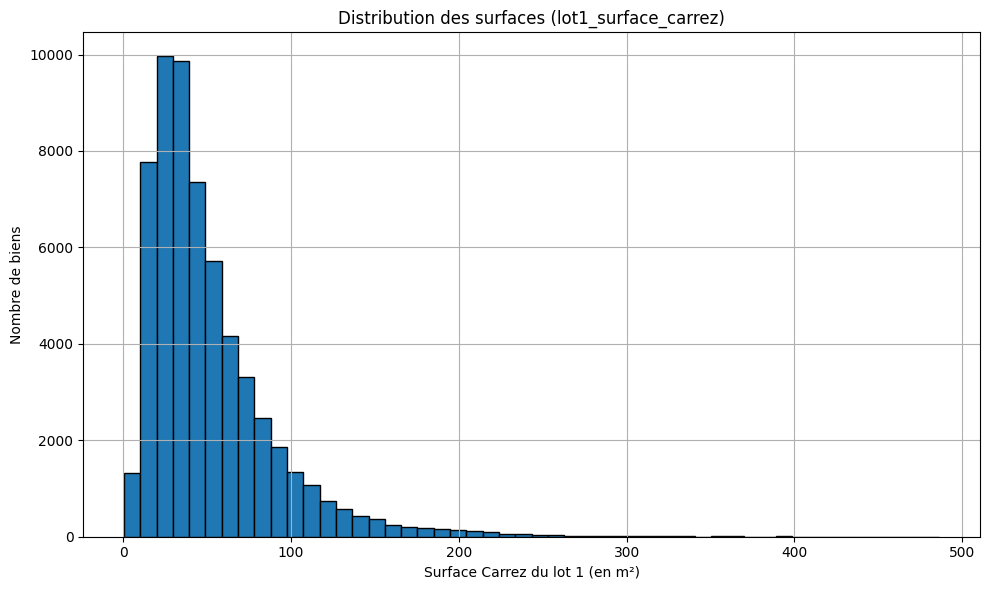

In [24]:
# Filtrage optionnel (pour éviter les valeurs aberrantes > 5000 m² par exemple)
df_filtered = df[df['lot1_surface_carrez'] <= 500]

# Affichage de l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['lot1_surface_carrez'], bins=50, edgecolor='black')
plt.xlabel("Surface Carrez du lot 1 (en m²)")
plt.ylabel("Nombre de biens")
plt.title("Distribution des surfaces (lot1_surface_carrez)")
plt.grid(True)
plt.tight_layout()
plt.show()

#### On va donc garder les biens entre 9 et 300 m2, les autres étant soit des valeures abberantes, soit ininterressantes. On pourrait aussi garder les 98% des données du centres ou un autre pourcentage.

In [25]:
#filtrage des données de surface entre 9 et 300 m2
df = df[(df['lot1_surface_carrez'] >= 9) & (df['lot1_surface_carrez'] <= 300)]

df.shape

(58950, 12)

In [26]:
df["lot1_surface_carrez"].describe()

count    58950.000000
mean        51.475410
std         37.438918
min          9.000000
25%         26.290000
50%         40.770000
75%         65.550000
max        299.770000
Name: lot1_surface_carrez, dtype: float64

#### Appliquons le même tri pour les valeures de prix

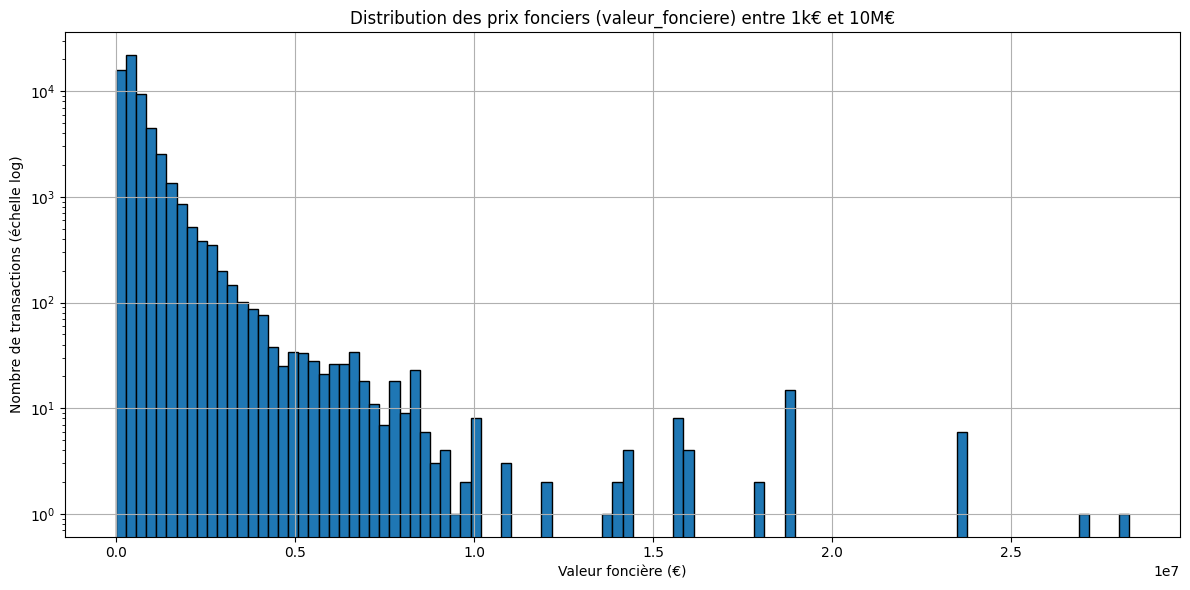

In [27]:
# Histogramme
plt.figure(figsize=(12, 6))
plt.hist(df['valeur_fonciere'], bins=100, edgecolor='black')

# Échelle log pour détecter les extrêmes tout en gardant les tendances visibles
plt.yscale('log')

plt.xlabel("Valeur foncière (€)")
plt.ylabel("Nombre de transactions (échelle log)")
plt.title("Distribution des prix fonciers (valeur_fonciere) entre 1k€ et 10M€")
plt.grid(True)
plt.tight_layout()
plt.show()

#### On vois qu'il y a des données dont le prix excède 200 millions d'euros ce qui ne nous intéresse pas, concentrons nous donc sur les données en dessous de 30 millions qui semblent plus réalistes

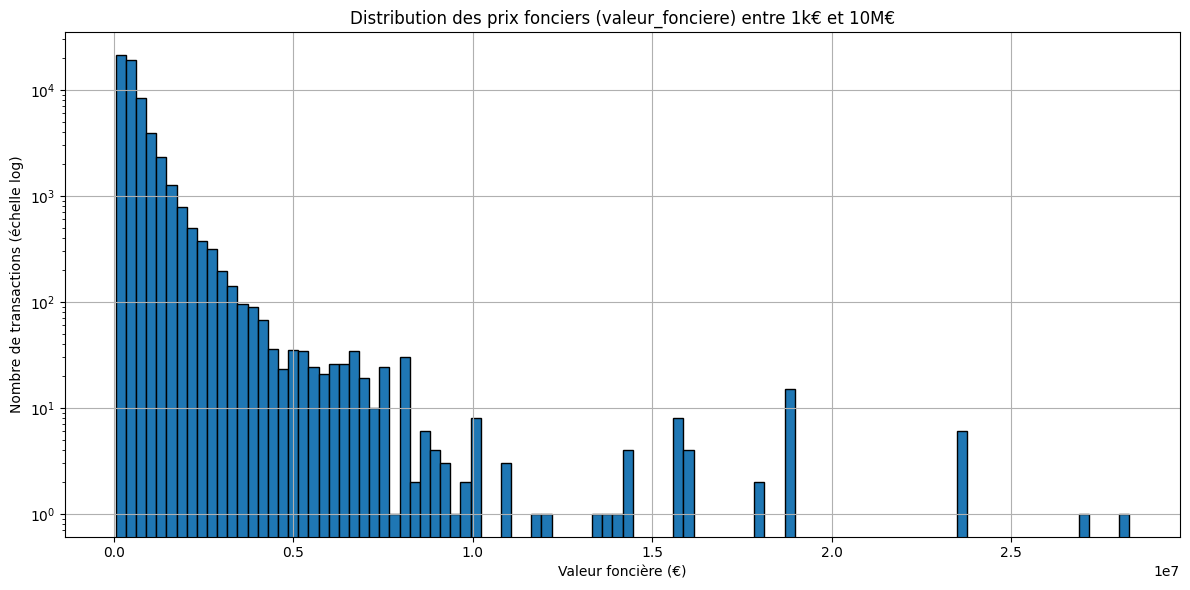

In [28]:
# Filtrage : garder les transactions avec un prix plus realiste
df_filtered = df[
    (df['valeur_fonciere'] >= 50000) & 
    (df['valeur_fonciere'] <= 30_000_000)
]

# Histogramme
plt.figure(figsize=(12, 6))
plt.hist(df_filtered['valeur_fonciere'], bins=100, edgecolor='black')

# Échelle log pour détecter les extrêmes tout en gardant les tendances visibles
plt.yscale('log')

plt.xlabel("Valeur foncière (€)")
plt.ylabel("Nombre de transactions (échelle log)")
plt.title("Distribution des prix fonciers (valeur_fonciere) entre 1k€ et 10M€")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Les données semblent réparties entre 50k euros et 20 millions, supprimons celles qui ne sont pas dans cette plage

In [29]:
# filtrage des données 
df = df[(df['valeur_fonciere'] >= 50_000) & (df['valeur_fonciere'] <= 20_000_000)]

df.shape

(58813, 12)

In [30]:
df["prix_au_m2"] = df["valeur_fonciere"] / df["lot1_surface_carrez"]

df["prix_au_m2"].describe()

count     58813.000000
mean      12601.565923
std       19436.353739
min         537.354417
25%        9360.730594
50%       10771.992819
75%       12421.142370
max      989010.989011
Name: prix_au_m2, dtype: float64

In [31]:
# filtrage des données 
df = df[(df['prix_au_m2'] >= 3_000) & (df['prix_au_m2'] <= 50_000)]

df.shape

(58039, 13)

#### Regardons maintenant la donnée nombre de pièce

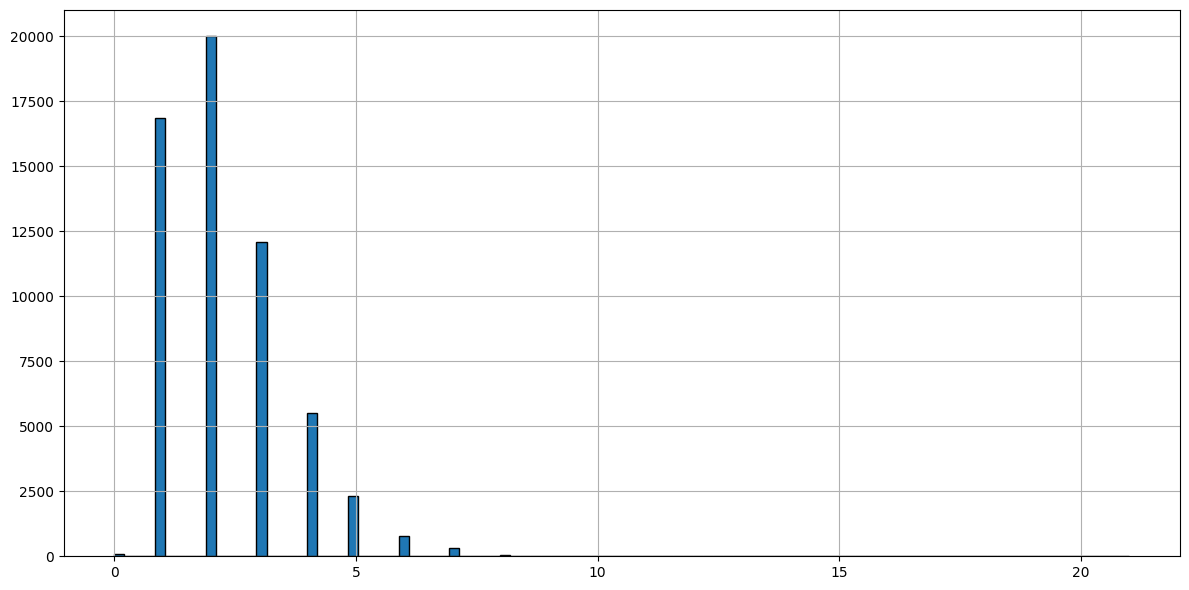

In [32]:
# Histogramme
plt.figure(figsize=(12, 6))
plt.hist(df['nombre_pieces_principales'], bins=100, edgecolor='black')

plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# regardons toutes les valeures différentes
df['nombre_pieces_principales'].unique()

array([ 2.,  1.,  8.,  5.,  6.,  3.,  4.,  7.,  0., 12., 10., 21.,  9.,
       17.])

In [34]:
valeurs_anormales = [0, 7, 8, 9, 10, 11, 12, 13, 34]
df_filtre = df[df['nombre_pieces_principales'].isin(valeurs_anormales)]

df_filtre

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,nom_commune,lot1_surface_carrez,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,prix_au_m2
9,2020-01-03,2350000.0,83.0,RUE DE MONCEAU,6419,75008.0,Paris 8e Arrondissement,204.32,212.0,8.0,2.315064,48.880175,11501.566171
307,2020-01-28,2607500.0,6.0,RUE ST PHILIPPE DU ROULE,8728,75008.0,Paris 8e Arrondissement,201.48,200.0,7.0,2.308209,48.873089,12941.731189
439,2020-02-07,4342410.0,32.0,AV PIERRE 1ER DE SERBIE,7471,75008.0,Paris 8e Arrondissement,268.87,269.0,8.0,2.300059,48.867550,16150.593223
880,2020-02-24,2015350.0,15.0,AV DE MESSINE,6296,75008.0,Paris 8e Arrondissement,183.06,173.0,8.0,2.312147,48.876537,11009.231946
1119,2020-02-26,1930000.0,48.0,RUE DE LA BIENFAISANCE,960,75008.0,Paris 8e Arrondissement,227.80,215.0,7.0,2.314472,48.876844,8472.344162
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316838,2022-04-07,5554792.0,11.0,BD DELESSERT,2674,75016.0,Paris 16e Arrondissement,252.02,238.0,7.0,2.286680,48.858657,22041.076105
317812,2022-05-05,3160000.0,50.0,BD EMILE AUGIER,3207,75016.0,Paris 16e Arrondissement,233.51,169.0,7.0,2.273114,48.862526,13532.611023
336272,2022-08-31,2325000.0,75.0,BD RASPAIL,8045,75006.0,Paris 6e Arrondissement,205.25,198.0,7.0,2.328128,48.848952,11327.649208
336487,2022-09-02,2810000.0,6.0,AV CONSTANT COQUELIN,2285,75007.0,Paris 7e Arrondissement,205.13,205.0,7.0,2.316983,48.847977,13698.630137


#### On décide de garder ces données en remplaçant le chiffre par une estimation du nombre de pièces pour ces données.

In [35]:
# si le nombre de pièce est dans valeures anormales, alors on regarde si il est possible (par exemple 11 pièces pour 280m2 est réaliste),
# et on remplace par une estimation si impossible
for index, row in df.iterrows():
    if row['nombre_pieces_principales'] in valeurs_anormales:
        if row['nombre_pieces_principales'] == 0 :
            df.at[index, 'nombre_pieces_principales'] = round(row['lot1_surface_carrez'] / 12)
        else : 
            if (row['lot1_surface_carrez']/row['nombre_pieces_principales']) < 7 or (row['lot1_surface_carrez']/row['nombre_pieces_principales']) > 25 : 
                if pd.notna(row['lot1_surface_carrez']) and round(row['lot1_surface_carrez'] / 12) != 0:
                    df.at[index, 'nombre_pieces_principales'] = round(row['lot1_surface_carrez'] / 12)
                else:
                    df.at[index, 'nombre_pieces_principales'] = 0


#### On supprime maintenant toutes les lignes où au moins une valeur est nulle

In [36]:
df= df.dropna()

#### On supprime le code_postal qui est parfaitement corrélé avec l'arrondissement, on créée la colonne pric_au_m2 qui est simplement le prix au mètre carré

In [37]:
#df.drop(columns='code_postal', inplace = True)

df["prix_au_m2"] = df["valeur_fonciere"] / df["lot1_surface_carrez"]

df.drop(columns='valeur_fonciere', inplace = True)

#### On transforme enfin la date en datetime, on ne conserve que l'année

In [38]:
# Conversion en datetime si ce n'est pas déjà fait
df['date_mutation'] = pd.to_datetime(df['date_mutation'])

# Extraire seulement l'année (en tant qu'entier)
df['année'] = df['date_mutation'].dt.year

In [39]:
# Convertir en entier puis extraire les deux derniers chiffres
df['arrondissement'] = df['code_postal'].astype(int) % 100

df.drop(columns="code_postal", inplace=True)
df.drop(columns='nom_commune', inplace=True)

In [40]:
# On exporte au format csv pour l'utiliser pour l'entrainement
df.to_csv("data/data_cleaned.csv", index=False)